# Análisis de metadatos

## Carga de datos

In [1]:
import pandas as pd
import tqdm

tqdm.tqdm.pandas()

/tmp/ipykernel_3626/265570574.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
collected_data = pd.read_json('../extractor_de_metadatos/all_collected_data.jsonl', lines=True)

In [3]:
collected_data.head()

,community_page,document_page,breadcrumb,file_urls,files
0,https://repositorio.umsa.bo/handle/123456789/1...,https://repositorio.umsa.bo/handle/123456789/3...,"[DSpace Home, Área Vicerrectorado, Biblioteca ...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...
1,https://repositorio.umsa.bo/handle/123456789/1...,https://repositorio.umsa.bo/handle/123456789/3...,"[DSpace Home, Área Vicerrectorado, Biblioteca ...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...
2,https://repositorio.umsa.bo/handle/123456789/1...,https://repositorio.umsa.bo/handle/123456789/3...,"[DSpace Home, Área Vicerrectorado, Biblioteca ...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...
3,https://repositorio.umsa.bo/handle/123456789/3...,https://repositorio.umsa.bo/handle/123456789/3...,"[DSpace Home, Facultad de Tecnología, Carrera ...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...
4,https://repositorio.umsa.bo/handle/123456789/3...,https://repositorio.umsa.bo/handle/123456789/3...,"[DSpace Home, Facultad de Tecnología, Carrera ...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...


In [4]:
collected_data['pdf_path'] = collected_data['files'].str[0].str['path']
collected_data['xml_path'] = collected_data['files'].str[1].str['path']

In [5]:
from parsel import Selector
import codecs

def read_file(filename):
    with codecs.open(filename, 'r', 'utf-8') as f:
        return f.read()

def get_field(xml_string: str, attribute, value, return_all_matches=False):
    sel = Selector(text=xml_string, type='xml')
    sel.register_namespace('dim', 'http://www.dspace.org/xmlns/dspace/dim')
    matches = sel.xpath(f'//dim:field[@{attribute}="{value}"]/text()')
    if return_all_matches:
        return matches.getall()
    return matches.get()

def get_title(xml_string):
    return  get_field(xml_string, 'element', 'title')

def get_abstract(xml_string):
    return get_field(xml_string, 'qualifier', 'abstract')

def get_subjects(xml_string):
    subjects_extracted = get_field(xml_string, 'element', 'subject', return_all_matches=True)
    return [s.upper() for s in subjects_extracted]

# collected_data['xml_content'] = collected_data['xml_path'].progress_map(lambda xml_path: read_file('../extractor_de_metadatos/files/' + xml_path), na_action='ignore')
collected_data['xml_content'] = collected_data['xml_path'].progress_map(lambda xml_path: read_file('../../scrapy/files/' + xml_path), na_action='ignore')

# get these fields as arrays 
collected_data['title'] = collected_data['xml_content'].progress_map(get_title, na_action='ignore')
collected_data['abstract'] = collected_data['xml_content'].progress_map(get_abstract, na_action='ignore')
collected_data['subjects'] = collected_data['xml_content'].progress_map(get_subjects, na_action='ignore')
collected_data.sample(10)

100%|█████████▉| 26826/26837 [00:02<00:00, 9699.09it/s] 


,community_page,document_page,breadcrumb,file_urls,files,pdf_path,xml_path,xml_content,title,abstract,subjects
3053,https://repositorio.umsa.bo/handle/123456789/3...,https://repositorio.umsa.bo/handle/123456789/2...,"[DSpace Home, Facultad de Medicina, Enfermería...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...,full/d078f62d0abcc74f6f617196fddfd359c02f6501,full/e0f2ce9a0e7462f381e76cff438017e41f220120.xml,"<?xml version=""1.0"" encoding=""UTF-8""?><mets:ME...",Síndrome de distrés respiratorio agudo asociad...,El Síndrome de Distrés Respiratorio Agudo (SDR...,"[MEDICINA CRITICA, TERAPIA INTENSIVA, DISTRES ..."
3259,https://repositorio.umsa.bo/handle/123456789/3...,https://repositorio.umsa.bo/handle/123456789/3...,"[DSpace Home, Facultad de Humanidades y Cienci...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...,full/f0c06bde71c12e1d3afdc5dd61de5524fbac5fd4,full/f56ccb36a7e46945822a0253c5014a4ef2a97735.xml,"<?xml version=""1.0"" encoding=""UTF-8""?><mets:ME...",Aplicaciones educativas virtuales en procesos ...,Las aplicaciones virtuales educativas hoy en d...,"[CLASES VIRTUALES, APLICACIONES EDUCATIVAS VIR..."
16391,https://repositorio.umsa.bo/handle/123456789/3...,https://repositorio.umsa.bo/handle/123456789/2...,"[DSpace Home, Facultad de Arquitectura, Artes,...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...,full/826b879d2659ff86f8dd90b25ad4de3bdc537f68,full/31ed5b09f5d92f69db0671a6e508159c641f437c.xml,"<?xml version=""1.0"" encoding=""UTF-8""?><mets:ME...","Albergue infantil : Alto Obrajes, municipio de...",Actualmente vivimos en un país con un elevado ...,"[ALBERGUES INFANTILES, CENTROS INFANTILES]"
454,https://repositorio.umsa.bo/handle/123456789/3...,https://repositorio.umsa.bo/handle/123456789/2...,"[DSpace Home, Facultad de Medicina, Enfermería...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...,full/1bdccc8c535facbe683878b0dd989c43980f233f,full/10076b870320930b9d892418b8688529685735a6.xml,"<?xml version=""1.0"" encoding=""UTF-8""?><mets:ME...",Factores que inciden en la aplicación del proc...,El proceso de atención de enfermería según la ...,"[ENFERMERIA, MEDICINA CRITICA, TERAPIA INTENSI..."
884,https://repositorio.umsa.bo/handle/123456789/3...,https://repositorio.umsa.bo/handle/123456789/5705,"[DSpace Home, Facultad de Medicina, Enfermería...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...,full/e666fa7fa54c853bfd4b5945889f84a5da9cb1e8,full/fd5021c254142740ab816430a420f6a1fee90d8d.xml,"<?xml version=""1.0"" encoding=""UTF-8""?><mets:ME...",Evaluación del efecto del extracto de alcaloid...,La medicina tradicional en Bolivia ha sido un ...,"[ÓRGANOS LINFÁTICOS, CÉLULAS FAGOCÍTICAS, MONO..."
378,https://repositorio.umsa.bo/handle/123456789/3...,https://repositorio.umsa.bo/handle/123456789/2...,"[DSpace Home, Facultad de Medicina, Enfermería...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...,full/7573e1670f84b4e1e4a684a436470bd2252c7d1c,full/4bab2bd06019bc6436d98df68e857d169b17c485.xml,"<?xml version=""1.0"" encoding=""UTF-8""?><mets:ME...",Desadaptación crónica a la vida en altura,A partir de la primera descripción hecha por M...,"[ALTURA, DESADAPTACIÓN]"
2346,https://repositorio.umsa.bo/handle/123456789/3...,https://repositorio.umsa.bo/handle/123456789/2...,"[DSpace Home, Facultad de Medicina, Enfermería...",[https://repositorio.umsa.bo/bitstream/handle/...,[{'url': 'https://repositorio.umsa.bo/bitstrea...,full/6ddd8fd5855c4b1b05386f07c8f8f3dd93b9e2bd,full/9c6522cf51ee6e599f35d9bfc7fb3d5099fa34ba.xml,"<?xml version=""1.0"" encoding=""UTF-8""?><mets:ME...",Estudio del maltrato en niños y adolescentes a...,Reducir los malos tratos en la infancia consti...,"[MEDICINA LEGAL, MEDICINA FORENSE, NIÑOS MALTR..."
148

## Tipos de documentos

In [10]:
collected_data['doc_type'] = collected_data['breadcrumb'].str[-2]
collected_data['faculty'] = collected_data['breadcrumb'].str[1]
collected_data['department'] = collected_data['breadcrumb'].str[2]

In [12]:
collected_data['doc_type'].value_counts()

doc_type
Tesis de Grado                     4696
Proyectos de Grado                 3221
Trabajos Dirigidos                 3111
Tesis                              3003
Folletería                         2358
                                   ... 
Revista Comunis                       1
Revistas Universidad y Sociedad       1
Tesis de doctorado                    1
Revista de Turismo                    1
Investigación Científica              1
Name: count, Length: 88, dtype: int64

## Presencia de palabras clave

In [16]:
# Valores nulos en el campo de palabras clave
collected_data['subjects'].isna().sum()

11

<Axes: xlabel='subjects'>

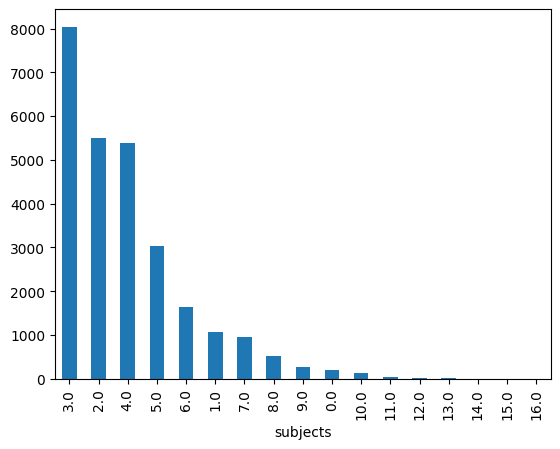

In [23]:
# contar numero de palabras clave por documento
collected_data['subjects'].str.len().value_counts().plot(kind='bar')

## Longitud de los textos de título y resumen

<Axes: >

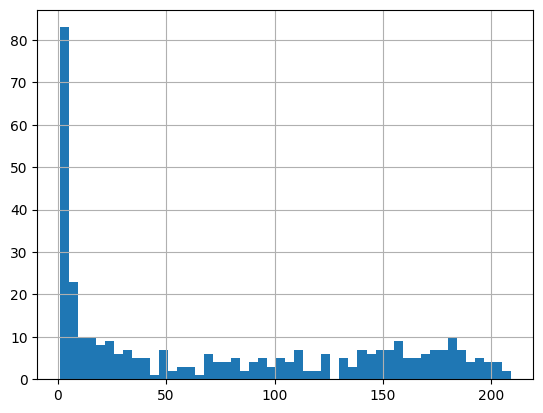

In [28]:
collected_data['title_length'] = collected_data['title'].str.len()
collected_data['title_length'].value_counts().hist(bins=50)

<Axes: >

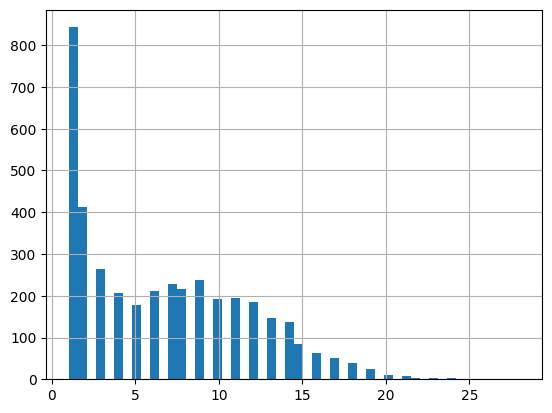

In [29]:
collected_data['abstract_length'] = collected_data['abstract'].str.len()
collected_data['abstract_length'].value_counts().hist(bins=50)